<a href="https://colab.research.google.com/github/Sharath2021/-LIVE-CLASS-MONITORING-SYSTEM-Face-Emotion-Recognition-/blob/main/LIVE_CLASS_MONITORING_SYSTEM(Face_Emotion_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importing libraries

import os
import cv2
import math
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model

from keras.utils import np_utils

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Capstone_Live Class Monitoring System/archive .zip'

In [19]:
# Extracting zip file

with ZipFile(file_name, 'r') as zip:
  zip.extractall(path='fer13')
  print('File extraction done')

File extraction done


In [20]:
# Reading input path

INPUT_PATH = "/content/fer13"

In [21]:
# specifying the image size we want to input in model

picture_size=48

In [22]:
# list of all the classes

classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

angry
disgust
fear
happy
neutral
sad
surprise


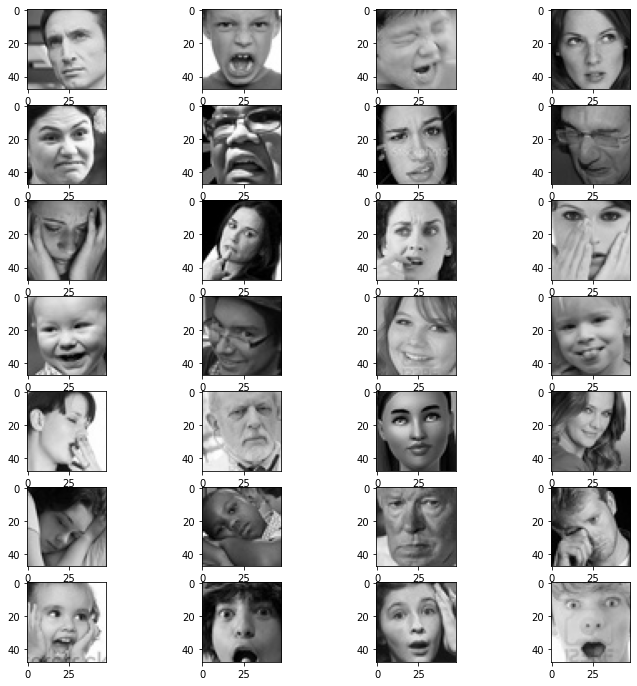

(48, 48, 3)


In [23]:
# viewing some of the images from each category

plt.figure(figsize= (12,12))
i=1
for category in classes:
  for j in range(1,5):
    plt.subplot(7,4,i)
    img = load_img(INPUT_PATH + "/" +"train/"+category+"/"+
                  os.listdir(INPUT_PATH + "/" + "train/" + category)[j], target_size=(picture_size, picture_size))
    plt.imshow(img)
    i+=1
  print(category) 
plt.show()
x=img_to_array(img)
print(x.shape)

In [24]:
# finding the count of images in each category

category=[]
examples=[]
for i in classes:
    dir=INPUT_PATH + "/"+ 'train/'+i
    onlyfiles = next(os.walk(dir))[2] #dir is your directory path as string
    category.append(i)
    examples.append(len(onlyfiles))

In [25]:
# creating a dataframe for the count of images

example_count_df=pd.DataFrame(category,columns=['Category'],index=[1,2,3,4,5,6,7])
example_count_df['No. of images']=examples
example_count_df

,Category,No. of images
1,angry,3995
2,disgust,436
3,fear,4097
4,happy,7215
5,neutral,4965
6,sad,4830
7,surprise,3171


Text(0.5, 1.0, 'Count of images in each category')

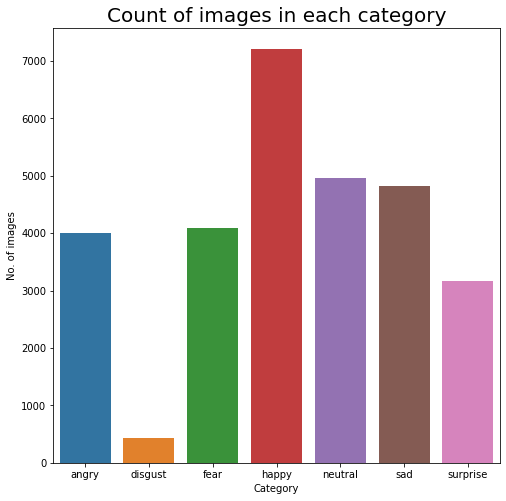

In [26]:
# visualizing

plt.figure(figsize=(8,8))
sns.barplot(x=example_count_df['Category'],y=example_count_df['No. of images'])
plt.title('Count of images in each category',fontsize=20)

In [27]:
# defining the train and test set 
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(INPUT_PATH + "/"+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(INPUT_PATH + "/"+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [28]:
# defining a CNN model
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

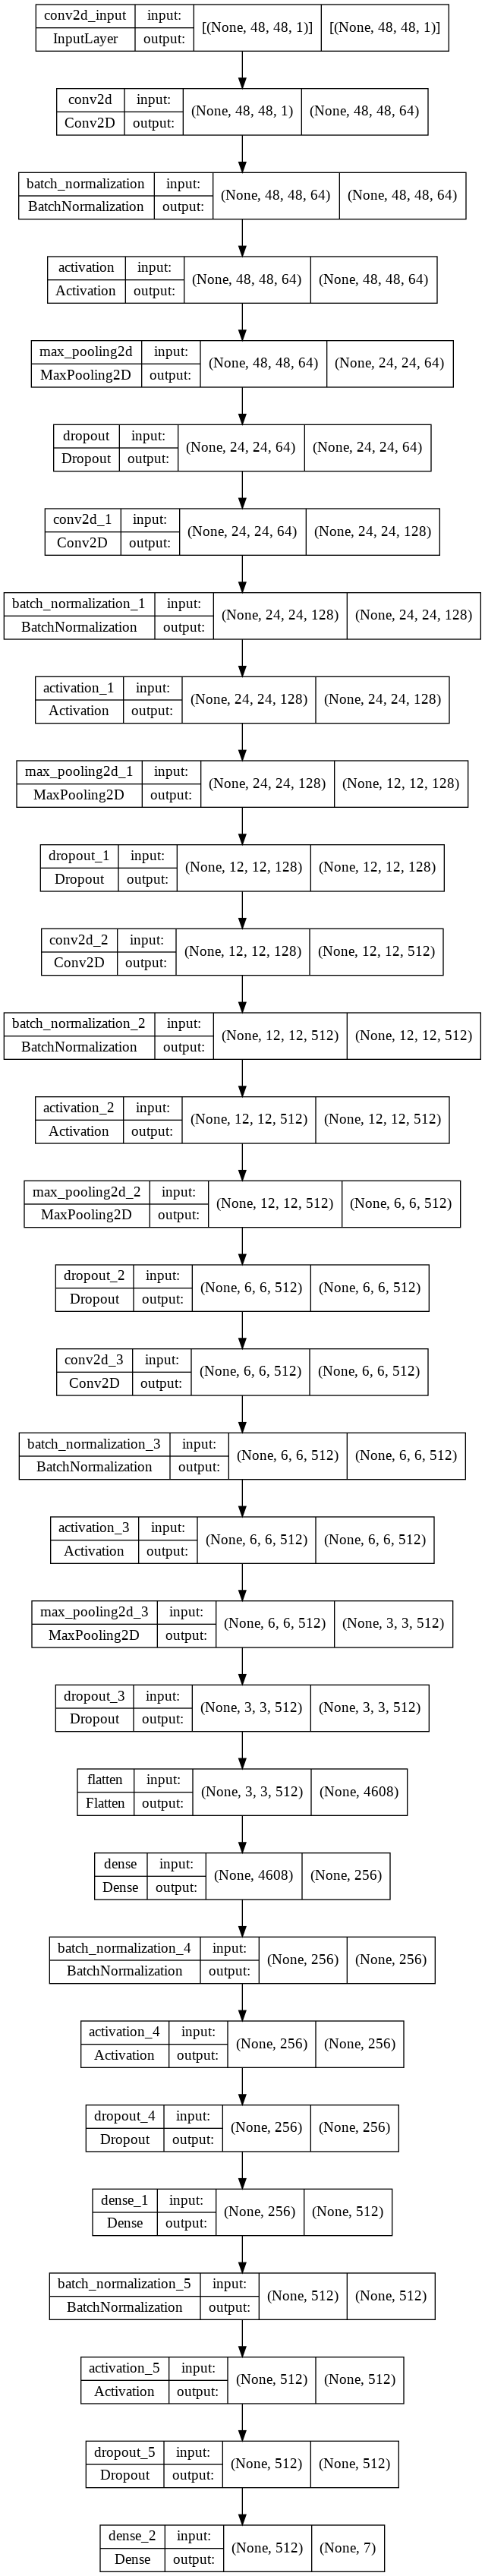

In [29]:
#Visualizing the model

tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True, expand_nested=True, to_file='model.png')

In [30]:
# defining a callback that will save the best model
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

# defining no. of epoch
epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [31]:
# Fitting and training the model
history = model.fit(train_set,
                        epochs=epochs,
                        validation_data = test_set,
                        callbacks=callbacks_list
                        )

Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.8427 - accuracy: 0.2813
Epoch 1: val_accuracy improved from -inf to 0.26637, saving model to model.h5
225/225 [==============================] - 37s 105ms/step - loss: 1.8427 - accuracy: 0.2813 - val_loss: 1.8748 - val_accuracy: 0.2664
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.5516 - accuracy: 0.4007
Epoch 2: val_accuracy improved from 0.26637 to 0.34244, saving model to model.h5
225/225 [==============================] - 23s 100ms/step - loss: 1.5516 - accuracy: 0.4007 - val_loss: 1.7922 - val_accuracy: 0.3424
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.3938 - accuracy: 0.4614
Epoch 3: val_accuracy improved from 0.34244 to 0.46489, saving model to model.h5
225/225 [==============================] - 23s 103ms/step - loss: 1.3938 - accuracy: 0.4614 - val_loss: 1.4014 - val_accuracy: 0.4649
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 

In [33]:
# Predicting Test Set
predictions=model.predict(test_set)

In [37]:
# loading the saved model
trained_model=load_model('model.h5')


In [38]:
# evaluating the train set
trained_model.evaluate(train_set)

225/225 [==============================] - 20s 87ms/step - loss: 0.6161 - accuracy: 0.7766


[0.6161318421363831, 0.7766205668449402]

In [39]:
# evaluating the test set
trained_model.evaluate(test_set)

57/57 [==============================] - 2s 37ms/step - loss: 0.9667 - accuracy: 0.6641


[0.966716468334198, 0.6641125679016113]

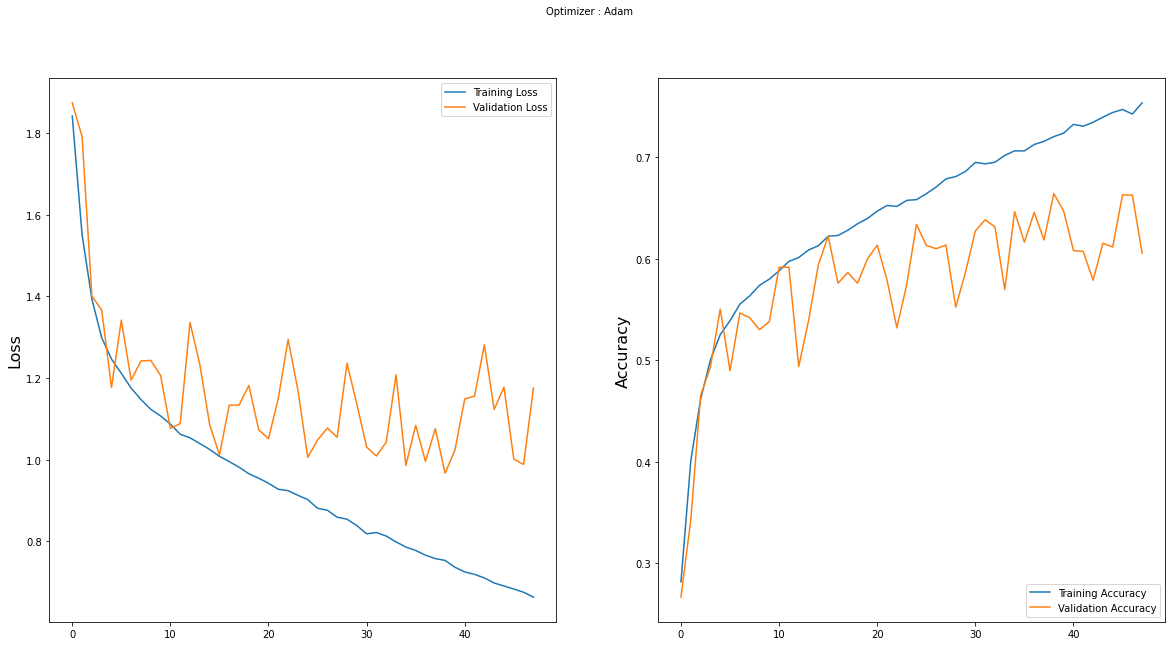

In [40]:
# plotting the Loss for training and validation set
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# plotting the Accuracy for training and validation set
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()